In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
from src.WatershedProcessor import WatershedProcessor
from config.config import DATA_MODEL_DIR, ESTACIONS_DIR, SWAT_PREDICTIONS_DIR, LSTM_DATA_DIR, UNGAUGED_DIR, OBSERVACIONS_DIR, OBSERVACIONS_FILTRAT_DIR
import os
import pandas as pd

In [13]:
estacions_aforament = pd.read_csv(ESTACIONS_DIR)
estacions_aforament

,Estació,UTM X,UTM Y,ID,amunt_em,nom,lat,lon
0,Aforament - Abrera,409650,4596023,1,no,a01,41.510746,1.917310
1,Aforament - Anglès (riera d'Osor),469379,4645530,2,si,a02,41.961161,2.630485
2,Aforament - Balsareny,407058,4634787,3,no,a03,41.859536,1.880218
3,Aforament - Berga (Olvan),407241,4659812,4,no,a04,42.084908,1.878476
4,Aforament - Boadella d'Empordà,488441,4686953,5,no,a05,42.334743,2.859691
...,...,...,...,...,...,...,...,...
68,Aforament - Tortellà - Llierca,467366,4677351,69,si,a69,42.247669,2.604416
69,Aforament - Vilabella,360657,4566063,70,si,a70,41.233967,1.337295
70,Aforament - Vilada (Merdançol),412493,4664696,71,si,a71,42.129491,1.941234
71,Aforament - Vilada (Riera Vilada),412353,4665951,72,si,a72,42.140776,1.939352


In [26]:
estacio = estacions_aforament.iloc[5]
estacio_lon = estacio['lon']
estacio_lat = estacio['lat']
estacio_nom = estacio['nom']

#estacio_lat = 41.306768
#estacio_lon = 2.127073

In [27]:
estacio_nom

'a06'

c:\Users\joans\anaconda3\envs\tfm\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


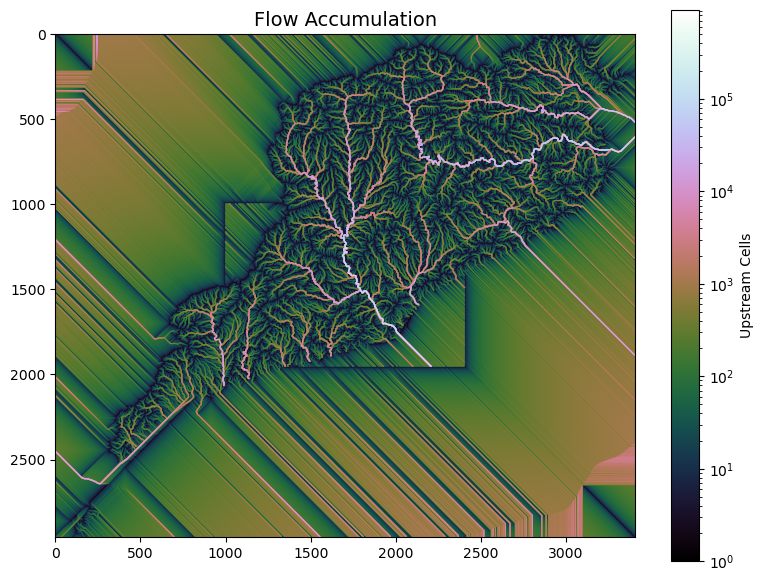

In [8]:
dem_path = DATA_MODEL_DIR / 'dem_ci_8857.tif'
soil_map_path = DATA_MODEL_DIR / 'soil_map_2_8857.tif'
corinne_path = DATA_MODEL_DIR / 'lu_8857.tif'

cic = WatershedProcessor(dem_path, soil_map_path, corinne_path)
cic.accumulation_map()

In [29]:
catchment = cic.find_watershed(estacio_lat, estacio_lon)

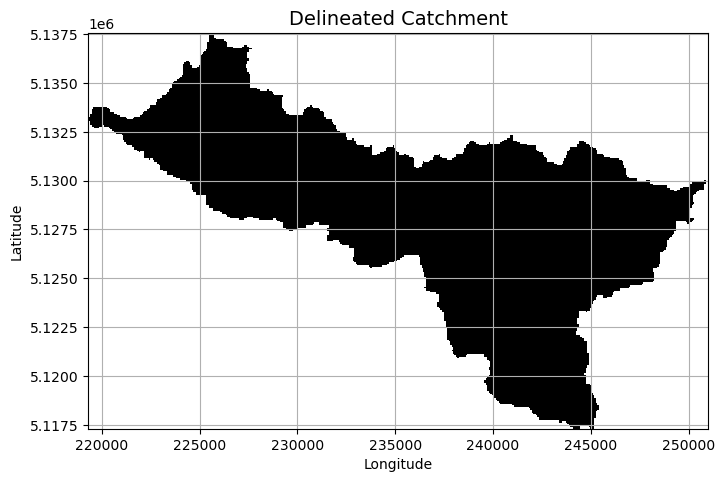

In [30]:
catchment.plot_catchhment_delineation()

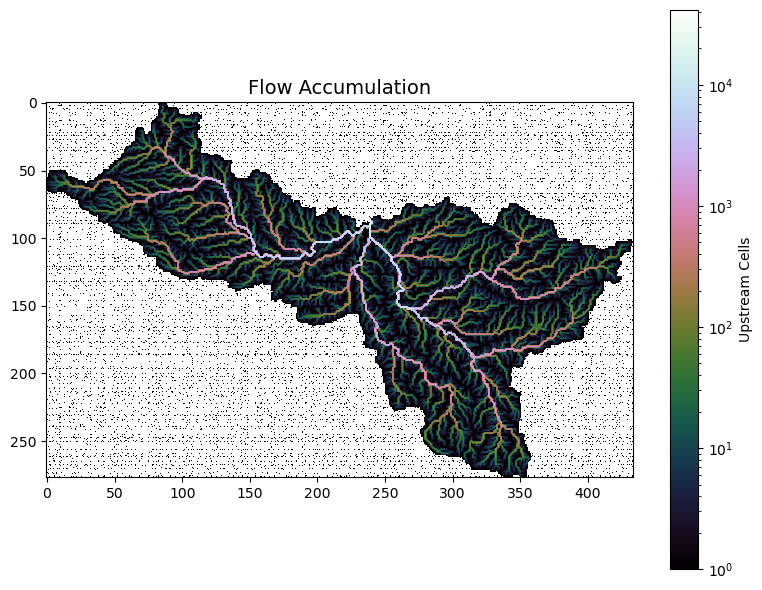

In [31]:
catchment.accumulation_map()

In [32]:
catchment.percentage_soil_type()

,Count,Percentage,Soil type
Number,,,
2,5495,13.222802,ustic
3,36062,86.777198,xeric
0,0,0.000000,criic
1,0,0.000000,udic
4,0,0.000000,aridic
5,0,0.000000,aquic


In [33]:
catchment.percentages_land_use()

,Count,Percentage,Land use
Number,,,
1,18950,45.600019,AGRH
2,1479,3.558967,AGRLL
3,18384,44.238035,FRST
4,772,1.857689,RNGB
5,1892,4.552783,URHD
6,80,0.192507,URLD
7,0,0.000000,WATR


In [34]:
catchment.avg_height()

166.83247

In [35]:
catchment.catchment_area()

221.63957816708276

In [36]:
catchment.catchment_slope()

0.07598665424020316

In [37]:
catchment.get_humidity_stations_data()

,humidity
datetime,
2000-01-01,0.829750
2000-01-02,0.842450
2000-01-03,0.892800
2000-01-04,0.838050
2000-01-05,0.855250
...,...
2022-12-27,0.886042
2022-12-28,0.865938
2022-12-29,0.844375


In [38]:
catchment.get_precipitation_stations_data()

,precipitation
datetime,
2000-01-01,0.00
2000-01-02,0.10
2000-01-03,0.10
2000-01-04,0.20
2000-01-05,0.20
...,...
2022-12-27,0.05
2022-12-28,0.00
2022-12-29,0.00


In [39]:
catchment.get_wind_stations_data()

,wind
datetime,
2000-01-01,2.180000
2000-01-02,2.190000
2000-01-03,2.770000
2000-01-04,2.250000
2000-01-05,2.290000
...,...
2022-12-27,0.439583
2022-12-28,0.664583
2022-12-29,0.352083


In [40]:
catchment.get_solar_stations_data()

,solar
datetime,
2000-01-01,6.762191
2000-01-02,6.762191
2000-01-03,6.762191
2000-01-04,6.762191
2000-01-05,6.762191
...,...
2022-12-27,7.840800
2022-12-28,8.159400
2022-12-29,6.561000


In [41]:
catchment.get_temperature_stations_data()

,temperature
datetime,
2000-01-01,2.598592
2000-01-02,2.598592
2000-01-03,2.598592
2000-01-04,2.598592
2000-01-05,2.598592
...,...
2022-12-27,2.100000
2022-12-28,3.400000
2022-12-29,1.900000


In [42]:
#read swat predictions
swat_predictions = pd.read_csv(SWAT_PREDICTIONS_DIR / 'swat_predictions.csv')
swat_predictions.set_index('datetime', inplace=True)
swat_predictions = swat_predictions[[estacio_nom]]

#remname
swat_predictions.rename(columns={estacio_nom: 'Flow'}, inplace=True)

#parse index to datetime
swat_predictions.index = pd.to_datetime(swat_predictions.index)

swat_predictions

KeyError: "None of [Index(['a06'], dtype='object')] are in the [columns]"

In [ ]:
streamflow_observations = catchment.get_station_streamflow(estacio_nom, swat_predictions)
streamflow_observations

,Flow
datetime,
2001-01-01,NaN
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,NaN
2001-01-05,NaN
...,...
2021-02-12,NaN
2021-02-13,NaN
2021-02-14,NaN


In [ ]:
stats = catchment.get_statistics(estacio_nom, streamflow_observations)
stats

,temperature,precipitation,Flow,area,avg_height,avg_slope,AGRH_landuse,AGRLL_landuse,FRST_landuse,RNGB_landuse,URHD_landuse,URLD_landuse,WATR_landuse,ustic_soiltype,xeric_soiltype,criic_soiltype,udic_soiltype,aridic_soiltype,aquic_soiltype
datetime,,,,,,,,,,,,,,,,,,,
2001-01-01,2.598592,0.00,NaN,221.639578,166.832474,0.075987,45.600019,3.558967,44.238035,1.857689,4.552783,0.192507,0.0,13.222802,86.777198,0.0,0.0,0.0,0.0
2001-01-02,3.650000,0.00,NaN,221.639578,166.832474,0.075987,45.600019,3.558967,44.238035,1.857689,4.552783,0.192507,0.0,13.222802,86.777198,0.0,0.0,0.0,0.0
2001-01-03,2.200000,0.00,NaN,221.639578,166.832474,0.075987,45.600019,3.558967,44.238035,1.857689,4.552783,0.192507,0.0,13.222802,86.777198,0.0,0.0,0.0,0.0
2001-01-04,3.550000,0.00,NaN,221.639578,166.832474,0.075987,45.600019,3.558967,44.238035,1.857689,4.552783,0.192507,0.0,13.222802,86.777198,0.0,0.0,0.0,0.0
2001-01-05,3.800000,0.00,NaN,221.639578,166.832474,0.075987,45.600019,3.558967,44.238035,1.857689,4.552783,0.192507,0.0,13.222802,86.777198,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,2.550000,2.30,NaN,221.639578,166.832474,0.075987,45.600019,3.558967,44.238035,1.857689,4.552783,0.192507,0.0,13.222802,86.777198,0.0,0.0,0.0,0.0
2021-02-13,3.150000,1.70,NaN,221.639578,166.832474,0.075987,45.600019,3.558967,44.238035,1.857689,4.552783,0.192507,0.0,13.222802,86.777198,0.0,0.0,0.0,0.0
2021-02-14,5.250000,0.85,NaN,221.639578,166.832474,0.075987,45.600019,3.558967,44.238035,1.857689,4.552783,0.192507,0.0,13.222802,86.777198,0.0,0.0,0.0,0.0


In [21]:
#STORE STATS IN CSV

#FOR EACH row in estacions_aforament
for i in range(len(estacions_aforament)):

    estacio = estacions_aforament.iloc[i]
    estacio_lon = estacio['lon']
    estacio_lat = estacio['lat']
    estacio_nom = estacio['nom']

    if estacio_nom not in ['a19', 'a20', 'a45', 'a65']: #Estacions amb dades de meteo molt dolentes, les descartem

        #read swat predictions
        swat_predictions = pd.read_csv(SWAT_PREDICTIONS_DIR / 'swat_predictions.csv')
        swat_predictions.set_index('datetime', inplace=True)

        if estacio_nom not in swat_predictions.columns:
            continue

        swat_predictions = swat_predictions[[estacio_nom]]

        #rename
        swat_predictions.rename(columns={estacio_nom: 'Flow'}, inplace=True)

        #parse index to datetime
        swat_predictions.index = pd.to_datetime(swat_predictions.index)

        catchment = cic.find_watershed(estacio_lat, estacio_lon)
        try:
            streamflow_observations = catchment.get_station_streamflow(estacio_nom, swat_predictions)
            stats = catchment.get_statistics(estacio_nom, streamflow_observations)

            #save stats
            stats.to_csv(LSTM_DATA_DIR / f'{estacio_nom}_stats.csv')

            print(estacio_nom)
        except:
            continue


a01
a03
a04
a05
a07
a08
a11
a13
a18
a21
a22
a23
a25
a28
a29
a30
a34
a37
a39
a42
a43
a44
a46
a47
a48
a49
a53
a54
a57
a58
a59
a62
a66
a68
a70
a73


In [4]:
#REPEAT FOR STORING ALL DATA IN DIFFERENT FOLDER (STATIONS WITH NO DATA INCLUDED)

#FOR EACH row in estacions_aforament
for i in range(len(estacions_aforament)):
    estacio = estacions_aforament.iloc[i]
    estacio_lon = estacio['lon']
    estacio_lat = estacio['lat']
    estacio_nom = estacio['nom']


    #read swat predictions
    swat_predictions = pd.read_csv(SWAT_PREDICTIONS_DIR / 'swat_predictions.csv')
    swat_predictions.set_index('datetime', inplace=True)

    if estacio_nom not in swat_predictions.columns:
        swat_predictions = None
    else:
        continue
    catchment = cic.find_watershed(estacio_lat, estacio_lon)
    try:
        streamflow_observations = catchment.get_station_streamflow(estacio_nom, swat_predictions)
        stats = catchment.get_statistics(estacio_nom, streamflow_observations)

        #save stats
        stats.to_csv(UNGAUGED_DIR / f'{estacio_nom}.csv')

        print(estacio_nom)
    except:
        continue


NameError: name 'estacions_aforament' is not defined